# STEP 1 : Importing Libraries and Dataset

In [ ]:
import os
os.chdir("C:\\Users\\Kumar Sundram\\Desktop\\DSP - 33\\Python\\LinearReg_data")
os.getcwd()

'C:\\Users\\Kumar Sundram\\Desktop\\DSP - 33\\Python\\LinearReg_data'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# STEP 2 : Data Cleaning and Preprocessing 

In [ ]:
# missing data
pd.DataFrame(dataset).isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [ ]:
# missing data
pd.DataFrame(dataset).isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
# check the number of features in the dataset
print(len(dataset))
print(len(dataset.columns))
# check the data type of each columns
print(dataset.dtypes)

50
5
R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


In [ ]:
# Find the information of the raw dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


# STEP 3 : Finding Correlation

In [ ]:
# to find the relation with Dependent variable vs Independant variable
features = dataset.iloc[:,0:3].columns.tolist()
features

['R&D Spend', 'Administration', 'Marketing Spend']

In [ ]:
target = dataset.iloc[:,4].name
target

'Profit'

In [ ]:
from scipy.stats import pearsonr 

In [ ]:
# Finding correlation of Profit with other variables to see how many variables are
    # strongly correlated with Profit
    
correlations = {}
for i in features:
    data = dataset[[i, target]]
    x1 = data[i].values
    x2 = data[target].values
    key = i + "Vs" + target
    correlations[key] = pearsonr(x1,x2)[0]

In [ ]:
correlations

{'R&D SpendVsProfit': 0.9729004656594832,
 'AdministrationVsProfit': 0.20071656826872136,
 'Marketing SpendVsProfit': 0.7477657217414766}

In [ ]:
data_correlations = pd.DataFrame(correlations, index = ['Value']).T
data_correlations.loc[data_correlations['Value'].abs().
                      sort_values(ascending=False).index]

,Value
R&D SpendVsProfit,0.972900
Marketing SpendVsProfit,0.747766
AdministrationVsProfit,0.200717


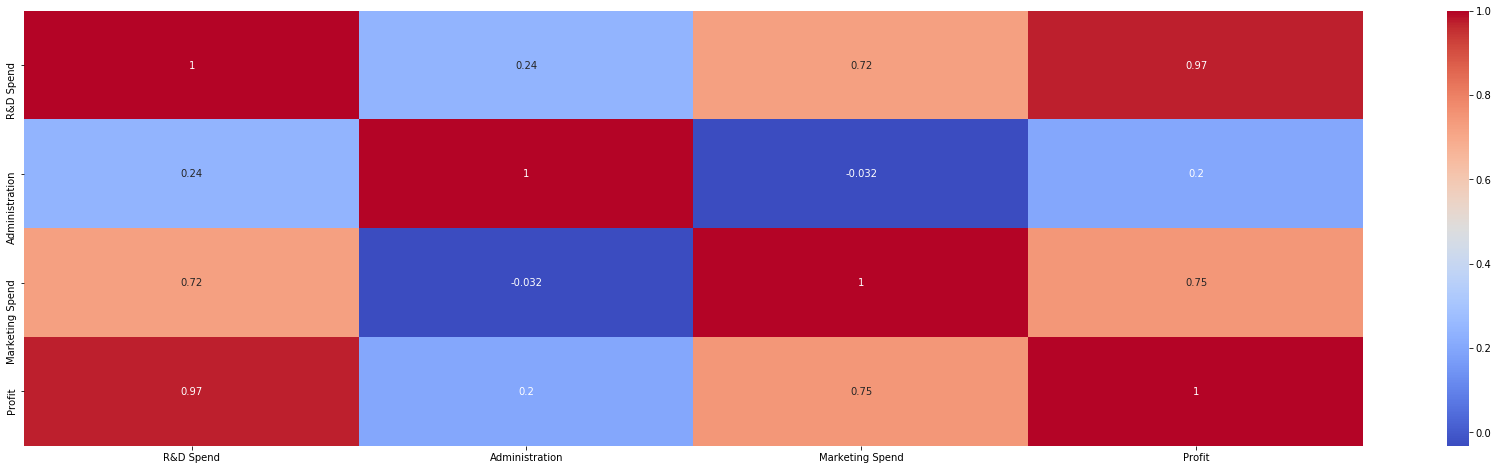

In [ ]:
plt.figure(figsize=(30,8))
sns.heatmap(dataset.corr(), cmap='coolwarm', annot=True)
plt.show()

# STEP 4 : EDA (EXploratory Data Analysis) or Data Visualisation

In [ ]:
from scipy.stats import stats
from scipy.stats import norm, skew

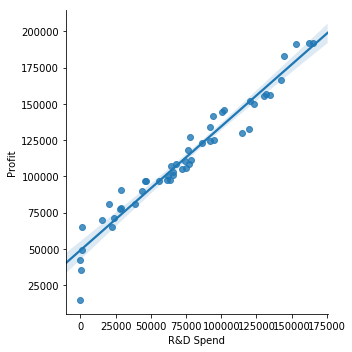

In [ ]:
sns.lmplot(x='R&D Spend', y='Profit', data=dataset)

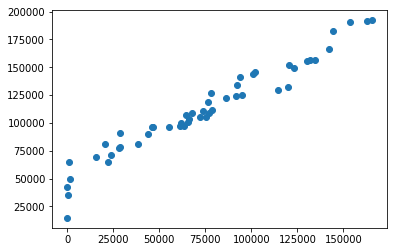

In [ ]:
plt.scatter(x='R&D Spend', y='Profit', data=dataset)

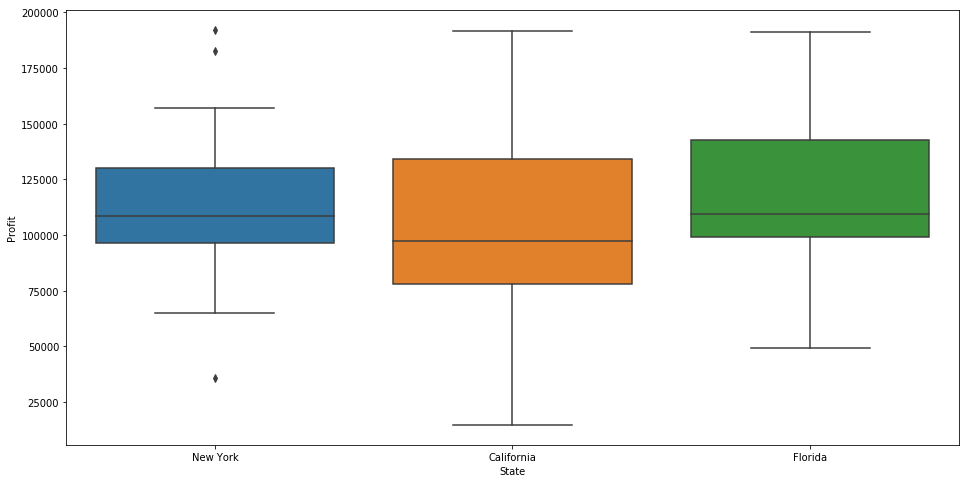

In [ ]:
plt.figure(figsize = (16,8))
sns.boxplot(x='State', y='Profit', data = dataset)
plt.show()

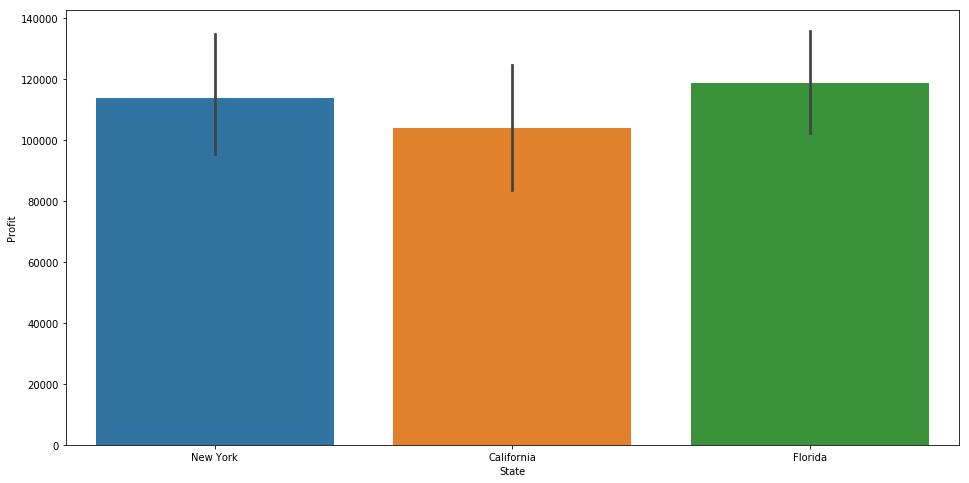

In [ ]:
plt.figure(figsize = (16,8))
sns.barplot(x='State', y='Profit', data = dataset)
plt.show()

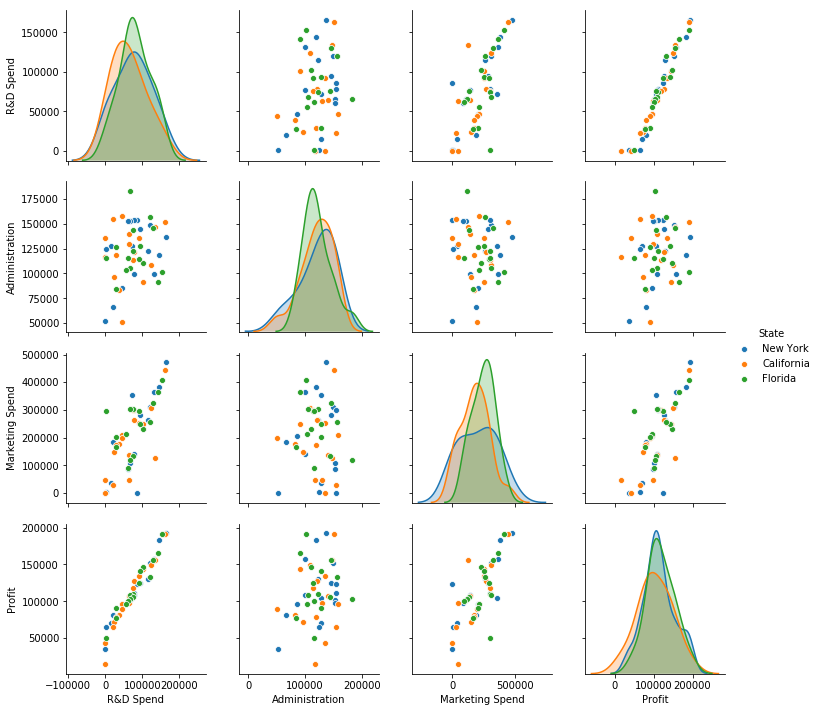

In [ ]:
sns.pairplot(dataset, hue='State')

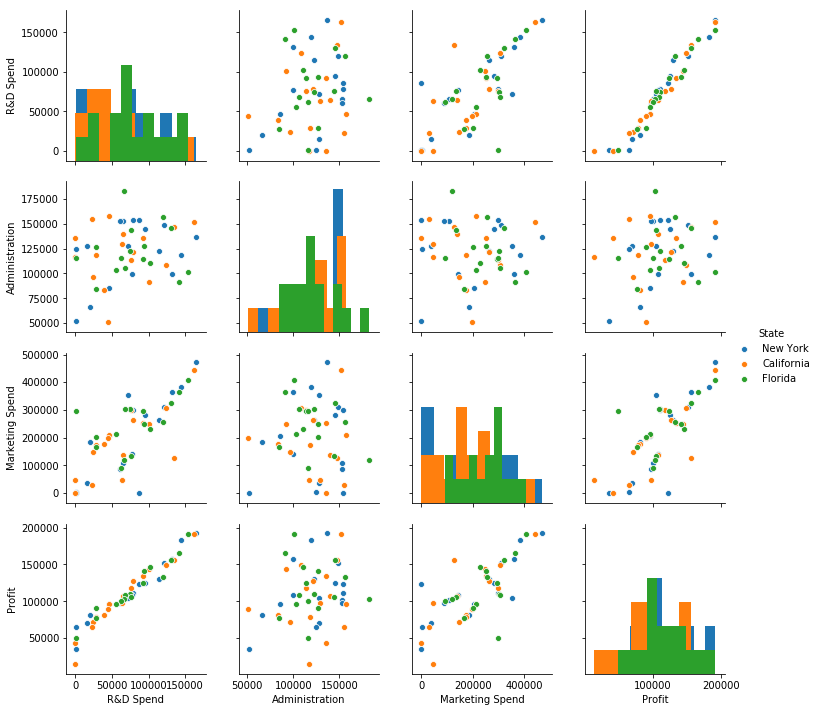

In [ ]:
sns.pairplot(dataset, hue='State', diag_kind='hist')

Text(0.5, 1.0, 'Profit Distribution')

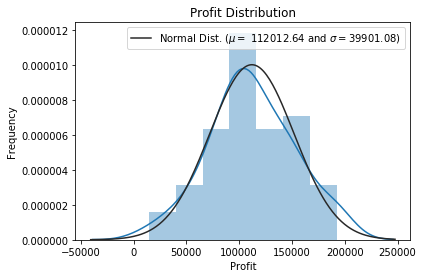

In [ ]:
# it's little complex but hope you understand
sns.distplot(dataset['Profit'], fit=norm);

# fitted with some parameter by using mu and sigma

(mu, sigma) = norm.fit(dataset['Profit'])

plt.legend(['Normal Dist. ($\mu=$ {:.2f} and $\sigma=${:.2f})'.format(mu, sigma)],
          loc='best')
plt.ylabel('Frequency')
plt.title("Profit Distribution")



# STEP 5 : Split the data into Ind and Dv

In [ ]:
x = dataset.iloc[:,0:4].values
dataset.head()
x

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [ ]:
y = dataset.iloc[:,4].values
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
labelencoder = LabelEncoder()
x[:,3] = labelencoder.fit_transform(x[:,3])

IndexError: too many indices for array

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
ct = ColumnTransformer([('one_hot_encoder',OneHotEncoder(categories='auto',),[3])],  
                       remainder='passthrough')

# in default categories = auto
onehot_x= np.array(ct.fit_transform(x), dtype=np.str)
# or the code in next line.


IndexError: tuple index out of range

In [ ]:
# please fix this bug by using different package

# STEP 6 : Spliting the data into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=101)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(37, 3)
(13, 3)
(37,)
(13,)


#############################################
# STEP 7 : Applying Machine Learning Model 

In [ ]:
# Please use Linear Regression Model

# Decision Tree
# Random Forest - Bagging
# Ensemble Techniques
    # GradientBoostingRegressor
    # AdaBoostRegressor
    # LightBM
    
# Support Vector Machine


# ML 1 : Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.metrics import explained_variance_score
from time import time
# Model Building
start = time()
decision = DecisionTreeRegressor()
decision.fit(x_train, y_train)
decc = decision.score(x_test,y_test)

# Prediction
decpredict = decision.predict(x_test)


# explained_variance_score - comparing pred vs actual
# confusion_matrix - comparing actual vs pred

# Score / Accuracy
exp_dec = explained_variance_score(decpredict, y_test)
end = time()
train_time_dec = end-start

In [ ]:
exp_dec


0.8929737990325485

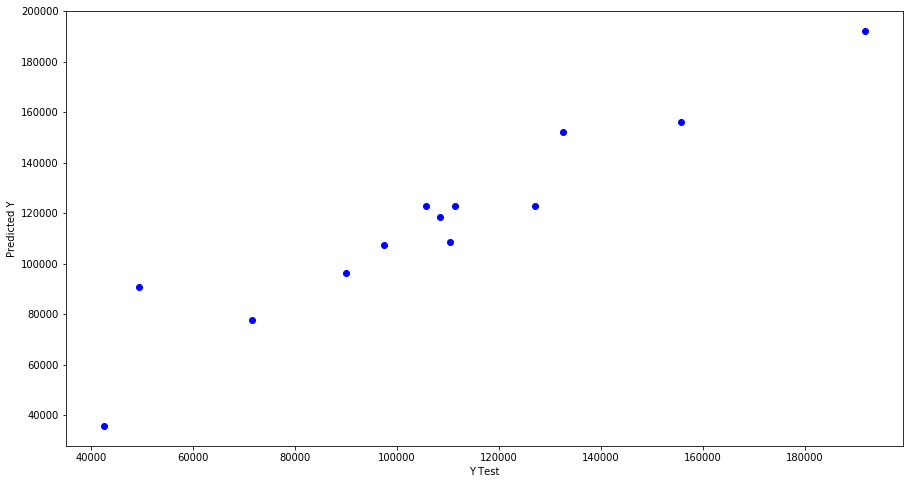

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,decpredict, c = 'blue')
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

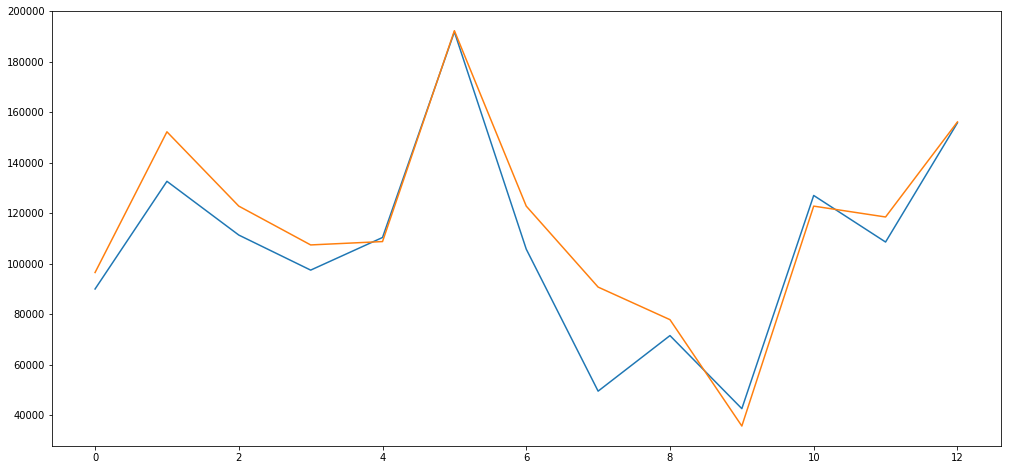

In [ ]:
plt.figure(figsize=(17,8))
plt.plot(y_test, label = "Test")
plt.plot(decpredict, label = "predict")
plt.show()

# ML 2 : RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
start = time()
rand_regr = RandomForestRegressor(n_estimators = 400, random_state=0)
rand_regr.fit(x_train, y_train)
random = rand_regr.score(x_test, y_test)

train_test_rand = end - start
predict_rand = rand_regr.predict(x_test)
exp_rand = explained_variance_score(predict_rand , y_test)
end = time()
train_time_rand = end-start

In [ ]:
exp_rand

0.9561607829048065

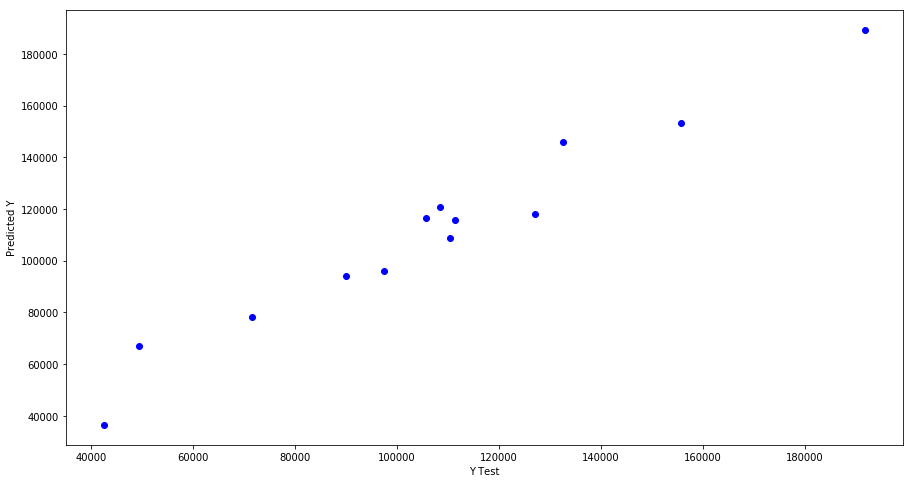

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predict_rand, c = 'blue')
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

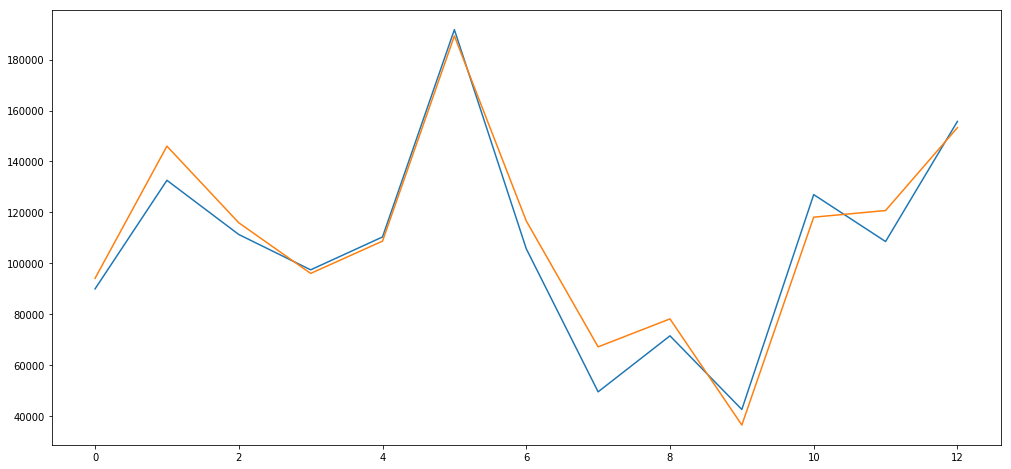

In [ ]:
plt.figure(figsize=(17,8))
plt.plot(y_test, label = "Test")
plt.plot(predict_rand, label = "predict")
plt.show()

# ML 3 : GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
start = time()
est = GradientBoostingRegressor(n_estimators = 400, max_depth=5, loss='ls', min_samples_split=2, learning_rate=0.1).fit(x_train, y_train)
gradient = est.score(x_test, y_test)
# Loss function - MAE, MAPE, MSE, RME

end = time()
train_test_est = end - start
predict_est = est.predict(x_test)
exp_est = explained_variance_score(predict_est, y_test)


In [ ]:
exp_est

0.8855213467065735

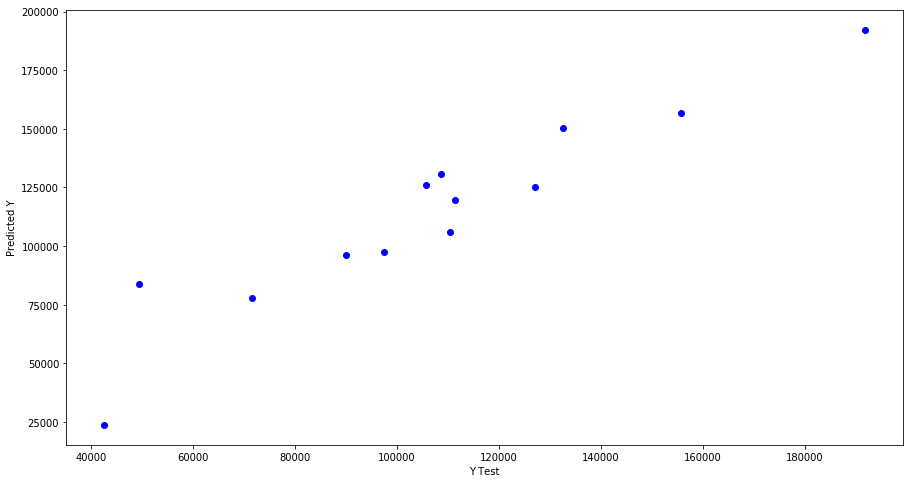

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predict_est, c = 'blue')
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

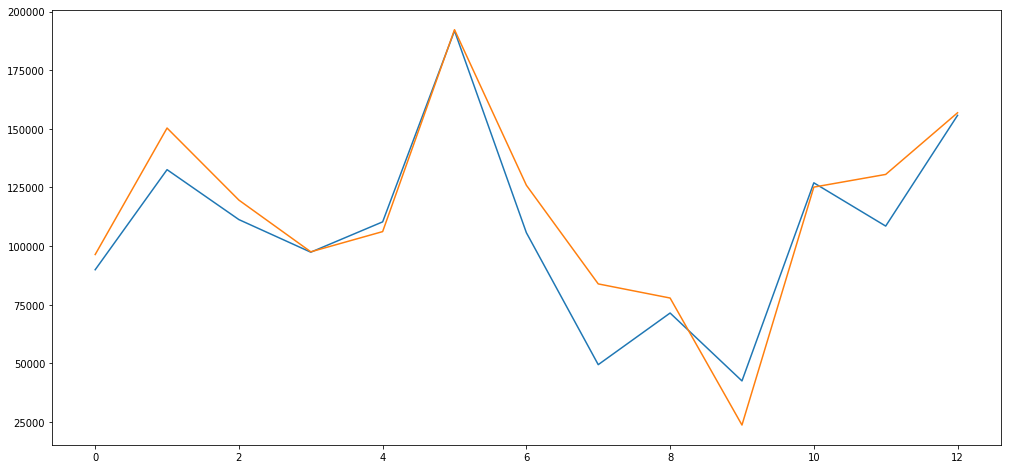

In [ ]:
plt.figure(figsize=(17,8))
plt.plot(y_test, label = "Test")
plt.plot(predict_est, label = "predict")
plt.show()

# ML 4 : AdaBoostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
start = time()
ada = AdaBoostRegressor(n_estimators=50, learning_rate=0.2, loss='exponential').fit(x_train, y_train)
adab = ada.score(x_test, y_test)
# Loss function - MAE, MAPE, MSE, RME

end = time()
train_test_ada = end - start
predict_ada = ada.predict(x_test)
exp_ada = explained_variance_score(predict_ada, y_test)

In [ ]:
exp_ada 

0.9085539359262127

# ML 5 : Support Vector Machine 

In [ ]:
from sklearn.svm import SVR
start = time()
svr = SVR(kernel='linear')
svr.fit(x_train, y_train)
end = time()
train_time_svr = end-start
svr1 = svr.score(x_test, y_test)
prediction_svr = svr.predict(x_test)
exp_svr = explained_variance_score(prediction_svr, y_test)


In [ ]:
exp_svr

0.9621134177836467

# ML 6 : LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
start = time()
regressor = LinearRegression()
regressor.fit(x_train, y_train)
end = time()
train_time_linear = end-start
regressor1 = regressor.score(x_test, y_test)
prediction_linear = regressor.predict(x_test)
exp_linear = explained_variance_score(prediction_linear, y_test)

In [ ]:
exp_linear

0.9733603625356173

# STEP 8 : Model Comparision

### Model Comparision on the basis of Model's Accuracy Score and Explained Variance score of different models

In [ ]:
model_validation = pd.DataFrame({
    'Model':['Decision Tree','Random Forest','Gradiant Boosting','AdaBoost',
            'Support Vector Machine','Linear Regression'],
    'Score': [decc,random,gradient,adab,svr1,regressor1],
    'Variance Score': [exp_dec,exp_rand,exp_est,exp_ada,exp_svr,exp_linear]
    
    
})


model_validation.sort_values(by='Score', ascending=False)

,Model,Score,Variance Score
5,Linear Regression,0.960477,0.973360
1,Random Forest,0.950627,0.956161
4,Support Vector Machine,0.934011,0.973360
0,Decision Tree,0.891589,0.923342
3,AdaBoost,0.890619,0.908554
2,Gradiant Boosting,0.843822,0.885521


# STEP 9 : Analysing training time for each model has taken

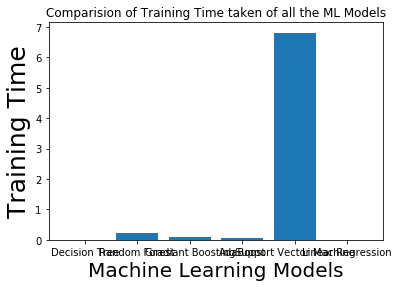

In [ ]:
Model = ['Decision Tree','Random Forest','Gradiant Boosting','AdaBoost',
            'Support Vector Machine','Linear Regression']
Train_time = [
    train_time_dec,
    train_test_rand,
    train_test_est,
    train_test_ada,
    train_time_svr,
    train_time_linear    
]

index = np.arange(len(Model))
plt.bar(index, Train_time)
plt.xlabel("Machine Learning Models", fontsize =20)
plt.ylabel("Training Time", fontsize = 25)
plt.xticks(index, Model, fontsize=10)
plt.title("Comparision of Training Time taken of all the ML Models")
plt.show()

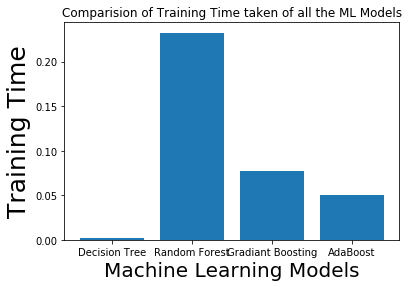

In [ ]:
Model = ['Decision Tree','Random Forest','Gradiant Boosting','AdaBoost']
            
Train_time = [
    train_time_dec,
    train_test_rand,
    train_test_est,
    train_test_ada,
  
]

index = np.arange(len(Model))
plt.bar(index, Train_time)
plt.xlabel("Machine Learning Models", fontsize =20)
plt.ylabel("Training Time", fontsize = 25)
plt.xticks(index, Model, fontsize=10)
plt.title("Comparision of Training Time taken of all the ML Models")
plt.show()

# STEP 10 : Improve your accuracy basis K-Fold methods

In [ ]:
# Gradiant Boosting Regressor
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = est, X = x_train, y=y_train, cv = 10)
accuracy

array([0.81408835, 0.74246157, 0.85985167, 0.67790203, 0.92203323,
       0.86992403, 0.81891893, 0.9396403 , 0.85275602, 0.96857396])

# STEP 11 : Conclusion

We have seen that accuracy of DecisionTree / Gradient Boosting is around 96.8% and 
also achieved decent variance score of 88.5% which is very close to 1.
Therefore, it is inferred that Gradient Boosting is the suitable model for this dataset.

** Thank You Very Much Indeed !!!